BUSINESS UNDERSTANDING

Africa is highly marketable to multinationals due to its vast natural resources, growing consumer market, and expanding economic opportunities. However conflict and Political instability can lead to supply chain disruptions, regulatory hurdles, and heightened security expenses, making it difficult for businesses to operate efficiently

This project will examine these factors using a structured data driven approach. We will use a data set from https://acleddata.com/about-acled/ . Using this data we shall;

Investigate insights on key risk factors causing the conflict, event forecasting, conflict risk score, and risk classification.
Analyze the data set to identify conflict prone areas, forecast conflict areas, establish conflict score for countries, risk classification for different countries.
Perform statistical tests to understand which areas are prone to conflict, their risk scores, forecast areas in future likely to experience conflict and classify different types of conflict.
Provide actionable recommendations to multinationals on conflicts in Africa in terms of areas prone to conflicts and types of conflict so they can formulate good risk management strategies.

OBJECTIVES

Conflict Analysis in Africa Establish a foundational understanding of conflict types, high-risk regions, and underlying causes by analyzing relevant data.

Dataset Exploration Gain familiarity with the dataset’s structure, terminology, and quality by examining key variables, including numerical and categorical data.

Business Insights for Site Selection Assist a multinational client in identifying conflict-free locations for a manufacturing facility by: a. Developing a predictive model to forecast conflict occurrences based on historical data and socio-political factors. b. Identifying key conflict drivers through correlation analysis of variables such as fatalities, disorder types, and actor involvement. c. Assessing spatial and temporal trends to understand conflict variations across regions and time periods. d. Evaluating conflict severity by predicting the likelihood of high-fatality events. e. Enhancing early warning systems through geographic risk assessments.

Statistical and Predictive Analysis

a. Conduct descriptive and exploratory analysis using measures such as mean, median, variance, and frequency distribution. b. Perform correlation analysis to examine relationships between key variables. c. Apply hypothesis testing, including ANOVA, to compare disorder types across locations. d. Use predictive modeling techniques like logistic regression to assess conflict probabilities. e. Conduct trend analysis to visualize conflict patterns over time.

Summary and Recommendations
Synthesize findings and provide strategic recommendations, including identifying the most suitable country for investment and highlighting conflict-driving factors.

DATA UNDERSTANDING

In [21]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [22]:
# import data and create df
# df = pd.read_csv("Revised Dataset Africa_1997-2025_Feb28.csv") # encoding issues
df = pd.read_csv("Revised Dataset Africa_1997-2025_Feb28.csv", encoding="latin-1")

#checking the first 5 columns
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,MLI33921,28/02/2025,2025,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Ibdakan,18.9689,2.0041,2,Al Zallaqa,New media,"On 28 February 2025, JNIM claimed to have targ...",0,NaN,1741039795
1,BFO13376,28/02/2025,2025,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,NaN,Rebel group,...,Gnangdin,11.3693,-0.3600,1,Undisclosed Source,Local partner-Other,"On 28 February 2025, an armed group (likely JN...",0,NaN,1741039795
2,MLI33922,28/02/2025,2025,1,Political violence,Violence against civilians,Attack,Military Forces of Mali (2021-),Wagner Group,State forces,...,Eghacher-Sediden,18.5558,1.1113,1,Twitter,New media,"On 28 February 2025, a FAMa and Wagner patrol ...",0,NaN,1741039795
3,GHA2795,28/02/2025,2025,1,Political violence,Violence against civilians,Attack,Land Guards,NaN,External/Other forces,...,Bibiani,6.4667,-2.3333,2,3 News,National,"On 28 February 2025, a land guard shot a farme...",0,NaN,1741039795
4,GHA2800,28/02/2025,2025,1,Political violence,Riots,Mob violence,Rioters (Ghana),NaN,Rioters,...,Accra,5.5560,-0.1969,3,Ghana Web,National,"On 28 February 2025, citizens threw stones at ...",0,crowd size=no report,1741039795


In [23]:
#checking the last 5 columns
df.tail()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
413942,SIE6,01/01/1997,1997,3,Political violence,Violence against civilians,Attack,Military Forces of Sierra Leone (1996-1997),NaN,State forces,...,York Island,7.5317,-12.4694,2,No Peace Without Justice; SL-LED,Local partner-New media,"Around 1 January 1997 (month of), Military For...",0,NaN,1670286851
413943,SIE7,01/01/1997,1997,3,Political violence,Battles,Armed clash,Kamajor Militia,NaN,Political militia,...,Fakunya,8.2310,-12.3380,2,SL-LED; No Peace Without Justice,Local partner-New media,"Around 1 January 1997 (month of), Kamajor Mili...",0,NaN,1670286851
413944,ANG2,01/01/1997,1997,3,Political violence,Violence against civilians,Attack,UNITA: National Union for the Total Independen...,NaN,Rebel group,...,Cuito,-12.3833,16.9333,3,Diario de Noticias (Angola),National,The total number of chiefs in the past 6 month...,10,NaN,1673316822
413945,SIE8,01/01/1997,1997,3,Strategic developments,Strategic developments,Headquarters or base established,Military Forces of Sierra Leone (1996-1997),NaN,State forces,...,Taiama,8.2013,-12.0600,2,No Peace Without Justice; SL-LED,Local partner-New media,base,0,NaN,1678830926
413946,CEN1,01/01/1997,1997,1,Political violence,Battles,Armed clash,Military Forces of the Central African Republi...,Mutiny of Military Forces of the Central Afric...,State forces,...,Bangui,4.3612,18.5549,1,All Africa,Regional,"4 deaths reported, denied by both sides, anti-...",2,NaN,1714437981


In [24]:
# checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413947 entries, 0 to 413946
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id_cnty       413947 non-null  object 
 1   event_date          413947 non-null  object 
 2   year                413947 non-null  int64  
 3   time_precision      413947 non-null  int64  
 4   disorder_type       413947 non-null  object 
 5   event_type          413947 non-null  object 
 6   sub_event_type      413947 non-null  object 
 7   actor1              413947 non-null  object 
 8   assoc_actor_1       114747 non-null  object 
 9   inter1              413947 non-null  object 
 10  actor2              301956 non-null  object 
 11  assoc_actor_2       85527 non-null   object 
 12  inter2              301956 non-null  object 
 13  interaction         413947 non-null  object 
 14  civilian_targeting  123147 non-null  object 
 15  iso                 413947 non-nul

In [25]:
df.describe()

,year,time_precision,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,413947.000000,4.139470e+05
mean,2017.527964,1.130737,510.399988,6.922263,21.886800,1.279074,2.439153,1.676141e+09
std,6.608510,0.393477,250.075057,15.495063,16.776814,0.494604,24.320917,5.263689e+07
min,1997.000000,1.000000,12.000000,-34.706800,-25.163100,1.000000,0.000000,1.552576e+09
25%,2015.000000,1.000000,231.000000,0.315600,8.155500,1.000000,0.000000,1.622068e+09
50%,2020.000000,1.000000,566.000000,6.693600,28.043600,1.000000,0.000000,1.689711e+09
75%,2022.000000,1.000000,710.000000,13.515700,33.483300,2.000000,1.000000,1.724714e+09
max,2025.000000,3.000000,894.000000,37.281500,64.683200,3.000000,1350.000000,1.741072e+09


In [26]:
#checking the dataset shape
df.shape

#The dataset has 413947 rows and 31 columns

(413947, 31)

In [27]:
# Listing the columns in the dataset
df.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')

DATA CLEANING

In [28]:
df.duplicated().sum()

# The data set has no duplicates

0

In [29]:
# make df copy to be used in data cleaning

data = df.copy()

In [30]:
# percentage of missing values per column
# sorted in descending order

data.isna().sum().sort_values(ascending=False)/len(data)*100

assoc_actor_2         79.338659
tags                  77.179204
assoc_actor_1         72.279785
civilian_targeting    70.250539
admin3                49.294958
inter2                27.054430
actor2                27.054430
admin2                 0.922823
admin1                 0.004107
year                   0.000000
time_precision         0.000000
disorder_type          0.000000
event_type             0.000000
sub_event_type         0.000000
actor1                 0.000000
inter1                 0.000000
event_date             0.000000
timestamp              0.000000
iso                    0.000000
interaction            0.000000
region                 0.000000
country                0.000000
location               0.000000
latitude               0.000000
longitude              0.000000
geo_precision          0.000000
source                 0.000000
source_scale           0.000000
notes                  0.000000
fatalities             0.000000
event_id_cnty          0.000000
dtype: f

In [31]:
# check for unique values in each column

for col in data.columns:
    print({col})
    print(data[col].unique())
    print()

{'event_id_cnty'}
['MLI33921' 'BFO13376' 'MLI33922' ... 'ANG2' 'SIE8' 'CEN1']

{'event_date'}
['28/02/2025' '27/02/2025' '26/02/2025' ... '03/01/1997' '02/01/1997'
 '01/01/1997']

{'year'}
[2025 2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012
 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998
 1997]

{'time_precision'}
[1 2 3]

{'disorder_type'}
['Political violence' 'Demonstrations' 'Strategic developments'
 'Political violence; Demonstrations']

{'event_type'}
['Explosions/Remote violence' 'Battles' 'Violence against civilians'
 'Riots' 'Protests' 'Strategic developments']

{'sub_event_type'}
['Remote explosive/landmine/IED' 'Armed clash' 'Attack' 'Mob violence'
 'Peaceful protest' 'Other' 'Agreement' 'Government regains territory'
 'Looting/property destruction' 'Non-violent transfer of territory'
 'Violent demonstration' 'Change to group/activity'
 'Non-state actor overtakes territory' 'Disrupted weapons use'
 'Protest with intervention' 'Arrest

In [32]:
#Drop irrelevant columns with a high percentage of missing values and also those that will not add any value in our analysis

data.drop(['year', 'civilian_targeting', 'iso', 'admin1', 'admin2', 'admin3','latitude', 'longitude', 'notes', 'tags', 'timestamp'],
          axis=1, inplace=True)

In [33]:
# percentage of missing values per column
# sorted in descending order

data.isna().sum().sort_values(ascending=False)/len(data)*100

assoc_actor_2     79.338659
assoc_actor_1     72.279785
actor2            27.054430
inter2            27.054430
inter1             0.000000
event_date         0.000000
time_precision     0.000000
disorder_type      0.000000
event_type         0.000000
sub_event_type     0.000000
actor1             0.000000
fatalities         0.000000
source_scale       0.000000
interaction        0.000000
region             0.000000
country            0.000000
location           0.000000
geo_precision      0.000000
source             0.000000
event_id_cnty      0.000000
dtype: float64

In [34]:
#Drop irrelevant columns with a high percentage of missing values and also those that will not add any value in our analysis

# Drop additional columns with the highets missing values
# 1. "assoc_actor_2" -  represents additional or supporting actor(s) associated with actor2.
# 2. "assoc_actor_1" - represents additional or supporting actor(s) associated with actor1
# 3. "actor2" - The secondary actor involved in the event (which may represent a target or another involved party).
# 4. "inter2"  - A categorical code describing actor2’s type

data.drop(['assoc_actor_2', 'assoc_actor_1', 'actor2', 'inter2'],
          axis=1, inplace=True)

In [36]:
# percentage of missing values per column
# sorted in descending order

data.isna().sum().sort_values(ascending=False)/len(data)*100

#The data now has no missing Values

fatalities        0.0
source_scale      0.0
source            0.0
geo_precision     0.0
location          0.0
country           0.0
region            0.0
interaction       0.0
inter1            0.0
actor1            0.0
sub_event_type    0.0
event_type        0.0
disorder_type     0.0
time_precision    0.0
event_date        0.0
event_id_cnty     0.0
dtype: float64

COnvert event_date column to datetime

In [37]:
data['event_date'] = pd.to_datetime(data['event_date'])
data['event_date'].dtype # confirm datatype

dtype('<M8[ns]')

In [38]:
# extract year and month and create event_Year and event_Month columns

data["event_Year"] = data["event_date"].dt.year
data["event_Month"] = data["event_date"].dt.month_name()
data.head()

,event_id_cnty,event_date,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,interaction,region,country,location,geo_precision,source,source_scale,fatalities,event_Year,event_Month
0,MLI33921,2025-02-28,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,JNIM: Group for Support of Islam and Muslims,Rebel group,State forces-Rebel group,Western Africa,Mali,Ibdakan,2,Al Zallaqa,New media,0,2025,February
1,BFO13376,2025-02-28,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,Rebel group,Rebel group-Identity militia,Western Africa,Burkina Faso,Gnangdin,1,Undisclosed Source,Local partner-Other,0,2025,February
2,MLI33922,2025-02-28,1,Political violence,Violence against civilians,Attack,Military Forces of Mali (2021-),State forces,State forces-Civilians,Western Africa,Mali,Eghacher-Sediden,1,Twitter,New media,0,2025,February
3,GHA2795,2025-02-28,1,Political violence,Violence against civilians,Attack,Land Guards,External/Other forces,External/Other forces-Civilians,Western Africa,Ghana,Bibiani,2,3 News,National,0,2025,February
4,GHA2800,2025-02-28,1,Political violence,Riots,Mob violence,Rioters (Ghana),Rioters,Rioters-Civilians,Western Africa,Ghana,Accra,3,Ghana Web,National,0,2025,February


In [39]:
# The data is now clean for Exploratory data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413947 entries, 0 to 413946
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_id_cnty   413947 non-null  object        
 1   event_date      413947 non-null  datetime64[ns]
 2   time_precision  413947 non-null  int64         
 3   disorder_type   413947 non-null  object        
 4   event_type      413947 non-null  object        
 5   sub_event_type  413947 non-null  object        
 6   actor1          413947 non-null  object        
 7   inter1          413947 non-null  object        
 8   interaction     413947 non-null  object        
 9   region          413947 non-null  object        
 10  country         413947 non-null  object        
 11  location        413947 non-null  object        
 12  geo_precision   413947 non-null  int64         
 13  source          413947 non-null  object        
 14  source_scale    413947 non-null  obj

In [40]:
#save the new dataframe in csv format

data.to_csv('cleaned_dataset_Africa_1997_2025.csv', index=False)

EXPLORATORY DATA ANALYSIS (EDA)

Questions
Identifying Conflict-Prone Areas

1. Which regions or countries have experienced the highest frequency of conflicts in the past decade?
2. How do historical conflict trends vary across different regions in Africa?
3. What spatial patterns can be observed in conflict-prone areas?
4. Are urban areas more prone to conflict than rural areas?
5. Do border regions experience more conflicts compared to inland areas?


In [41]:
df.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')

In [49]:
# Now load the clean data set fro EDA

conflict = pd.read_csv('cleaned_dataset_Africa_1997_2025.csv')
conflict.head()

,event_id_cnty,event_date,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,interaction,region,country,location,geo_precision,source,source_scale,fatalities,event_Year,event_Month
0,MLI33921,2025-02-28,1,Political violence,Explosions/Remote violence,Remote explosive/landmine/IED,JNIM: Group for Support of Islam and Muslims,Rebel group,State forces-Rebel group,Western Africa,Mali,Ibdakan,2,Al Zallaqa,New media,0,2025,February
1,BFO13376,2025-02-28,1,Political violence,Battles,Armed clash,JNIM: Group for Support of Islam and Muslims,Rebel group,Rebel group-Identity militia,Western Africa,Burkina Faso,Gnangdin,1,Undisclosed Source,Local partner-Other,0,2025,February
2,MLI33922,2025-02-28,1,Political violence,Violence against civilians,Attack,Military Forces of Mali (2021-),State forces,State forces-Civilians,Western Africa,Mali,Eghacher-Sediden,1,Twitter,New media,0,2025,February
3,GHA2795,2025-02-28,1,Political violence,Violence against civilians,Attack,Land Guards,External/Other forces,External/Other forces-Civilians,Western Africa,Ghana,Bibiani,2,3 News,National,0,2025,February
4,GHA2800,2025-02-28,1,Political violence,Riots,Mob violence,Rioters (Ghana),Rioters,Rioters-Civilians,Western Africa,Ghana,Accra,3,Ghana Web,National,0,2025,February


In [50]:
conflict.columns

Index(['event_id_cnty', 'event_date', 'time_precision', 'disorder_type',
       'event_type', 'sub_event_type', 'actor1', 'inter1', 'interaction',
       'region', 'country', 'location', 'geo_precision', 'source',
       'source_scale', 'fatalities', 'event_Year', 'event_Month'],
      dtype='object')

In [51]:
conflict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413947 entries, 0 to 413946
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_id_cnty   413947 non-null  object
 1   event_date      413947 non-null  object
 2   time_precision  413947 non-null  int64 
 3   disorder_type   413947 non-null  object
 4   event_type      413947 non-null  object
 5   sub_event_type  413947 non-null  object
 6   actor1          413947 non-null  object
 7   inter1          413947 non-null  object
 8   interaction     413947 non-null  object
 9   region          413947 non-null  object
 10  country         413947 non-null  object
 11  location        413947 non-null  object
 12  geo_precision   413947 non-null  int64 
 13  source          413947 non-null  object
 14  source_scale    413947 non-null  object
 15  fatalities      413947 non-null  int64 
 16  event_Year      413947 non-null  int64 
 17  event_Month     413947 non-nu

1. Univariate Data Analysis

Univariate analysis is a statistical technique used to describe and summarize the distribution of a single variable. It is often used as a preliminary step in data analysis to identify patterns, trends, and outliers.

In [56]:
# 1. count plot - Which event type has the highest number of events?
event_type_counts = conflict['event_type'].value_counts()
print(event_type_counts)

Battles                       105556
Violence against civilians    100372
Protests                       94993
Riots                          42737
Strategic developments         38984
Explosions/Remote violence     31305
Name: event_type, dtype: int64


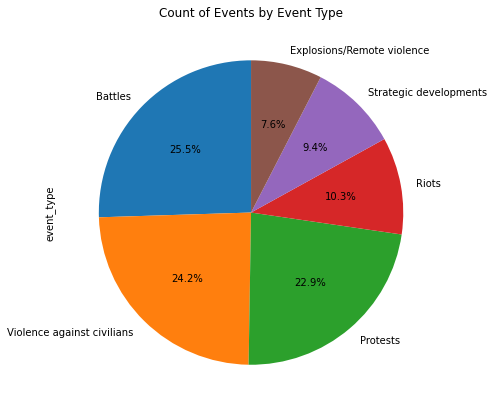

In [60]:
plt.figure(figsize=(10, 7))
conflict["event_type"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Count of Events by Event Type")
plt.show()

In [57]:
# 1. count plot - Which event type has the highest number of events?
disorder_type_counts = conflict['disorder_type'].value_counts()
print(disorder_type_counts)

Political violence                    256514
Demonstrations                        115877
Strategic developments                 38984
Political violence; Demonstrations      2572
Name: disorder_type, dtype: int64


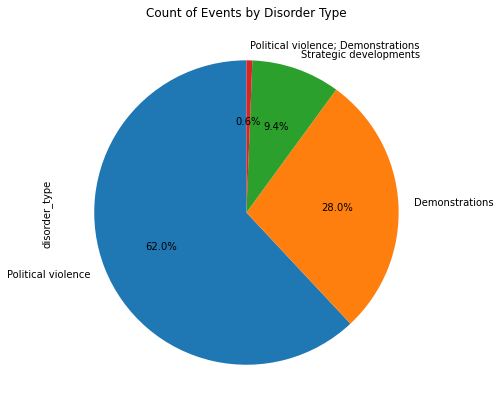

In [61]:
plt.figure(figsize=(10, 7))
conflict["disorder_type"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Count of Events by Disorder Type")
plt.show()

In [62]:
# 1. count plot - Which country has the highest number of events?
disorder_type_counts = conflict['region'].value_counts()
print(disorder_type_counts)

Eastern Africa     129294
Northern Africa     93960
Western Africa      92353
Middle Africa       65031
Southern Africa     33309
Name: region, dtype: int64


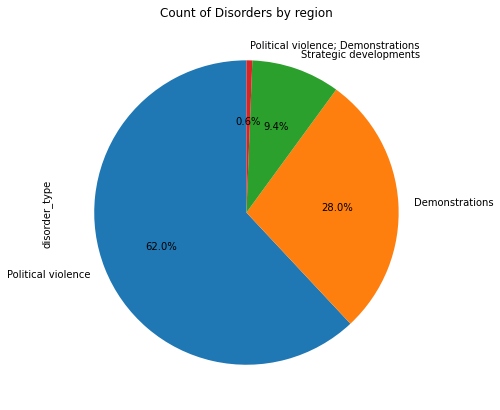

In [63]:
plt.figure(figsize=(10, 7))
conflict["disorder_type"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Count of Disorders by region")
plt.show()

In [55]:
# 1. count plot - Which country has the highest number of events?
event_type_counts = conflict['region'].value_counts()
print(event_type_counts)

Eastern Africa     129294
Northern Africa     93960
Western Africa      92353
Middle Africa       65031
Southern Africa     33309
Name: region, dtype: int64


In [52]:
# 1. count plot - Which country has the highest number of events?
disorder_type_counts = conflict['country'].value_counts()
print(disorder_type_counts)

Somalia                                         48651
Nigeria                                         40480
Democratic Republic of Congo                    33961
Sudan                                           33287
South Africa                                    22662
Kenya                                           16693
Cameroon                                        16248
Ethiopia                                        14599
South Sudan                                     14422
Morocco                                         13059
Algeria                                         12712
Mali                                            12302
Burkina Faso                                    12079
Libya                                           11898
Egypt                                           11801
Tunisia                                         11203
Burundi                                         10868
Uganda                                           9183
Central African Republic    

In [53]:
# 1. count plot - Which country has the highest number of events?
event_type_counts = conflict['country'].value_counts()
print(event_type_counts)

Somalia                                         48651
Nigeria                                         40480
Democratic Republic of Congo                    33961
Sudan                                           33287
South Africa                                    22662
Kenya                                           16693
Cameroon                                        16248
Ethiopia                                        14599
South Sudan                                     14422
Morocco                                         13059
Algeria                                         12712
Mali                                            12302
Burkina Faso                                    12079
Libya                                           11898
Egypt                                           11801
Tunisia                                         11203
Burundi                                         10868
Uganda                                           9183
Central African Republic    

In [ ]:
# 1. count plot - Which investigation type has the highest number of events?
investigation_type_counts = aviation['Investigation.Type'].value_counts()
print(investigation_type_counts)